In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_2015= pd.read_csv('2015_prep.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [201]:
loan_2015 = pd.read_csv('loan_data_inputs_2015.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
loan_2015.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:Rent_Other_None_Any,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earlies

In [5]:
#from sklearn.model_selection import train_test_split

In [6]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_2015.drop('good_bad', axis = 1), loan_data_2015['good_bad'], test_size = 0.2, random_state = 42)


In [1]:
#loan_data_inputs_train.shape

In [2]:
#loan_data_inputs_test.shape

In [3]:
#loan_data_targets_train.shape

In [4]:
#loan_data_targets_test.shape

In [5]:
#loan_data_2015.shape

Let's quickly define the models we will be making in this notebook.

## LGD Model (Loss Given Default)

The percentage of the exposure that was lost after the borrower defaulted.

## EAD Model (Exposure at Default)

The amount of the exposure at the moment the borrower defualted.

When building these models, it is good practice to build models with data from borrowers that have enough time to repay part of the remaining debt.

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
pd.options.display.max_rows = None

In [14]:
loan_data_2015.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0,10.0,1990-02-01,334.0,60,2015-12-01,24.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul

In [15]:
loan_data_2015_def = loan_data_2015[loan_data_2015['loan_status'].isin(['Charged Off',
                                                                                'Does not meet the credit policy. Status:Charged Off'])]

In [16]:
loan_data_2015_def.shape

(2773, 204)

## 1. Check if there are any missing values in the variables we want to use, and preprocess some of the data, if needed.

In [17]:
#compare to cell 75 on the other LGD model from the course.
loan_data_2015_def.isnull().sum()

Unnamed: 0                                0
id                                        0
member_id                                 0
loan_amnt                                 0
funded_amnt                               0
funded_amnt_inv                           0
term                                      0
int_rate                                  0
installment                               0
grade                                     0
sub_grade                                 0
emp_title                               203
emp_length                              203
home_ownership                            0
annual_inc                                0
verification_status                       0
issue_d                                   0
loan_status                               0
pymnt_plan                                0
url                                       0
desc                                   2773
purpose                                   0
title                           

In [18]:
loan_data_2015_def['mths_since_last_delinq'].fillna(0, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
loan_data_2015_def['mths_since_last_record'].fillna(0, inplace = True)

## 2. Calculate recovery rates and investigate their distribution.

How can we calculate the recovery rate in our data? We can find the amount recovered in the column 'recoveries'

We assumed that for defualt borrowers, 'funded_amount' reflects the total amount that was lost the moment the borrower defualted.


In [20]:
loan_data_2015_def['recovery_rate'] = loan_data_2015_def['recoveries'] / loan_data_2015_def['funded_amnt']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
loan_data_2015_def['recovery_rate'] = np.where(loan_data_2015_def['recovery_rate'] > 1, 1, loan_data_2015_def['recovery_rate'])
loan_data_2015_def['recovery_rate'] = np.where(loan_data_2015_def['recovery_rate'] < 0, 0, loan_data_2015_def['recovery_rate'])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
loan_data_2015_def['recovery_rate'].describe()

count    2773.000000
mean        0.022126
std         0.077949
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: recovery_rate, dtype: float64

Recovery rate is the dependent variable for the LGD model.

Let's call the proportion from the funded amount that the borrower would need to repay 'CCF' (Credit Conversion Factor). 

If all was was paid, CCF = 0

If none was paid, CCF = 1

In [23]:
loan_data_2015_def['CCF'] = (loan_data_2015_def['funded_amnt'] - loan_data_2015_def['total_rec_prncp']) / loan_data_2015_def['funded_amnt']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
loan_data_2015_def['CCF'].describe()

count    2773.000000
mean        0.935944
std         0.062767
min         0.042205
25%         0.911643
50%         0.949757
75%         0.971621
max         1.000000
Name: CCF, dtype: float64

In [25]:
#loan_data_2015.to_csv('loan_data_2015.csv') ----> Not needed?

### Explore Dependent Variables

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.472e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.900e+01, 1.270e+02,
        6.700e+01, 1.100e+01, 2.200e+01, 1.200e+01, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

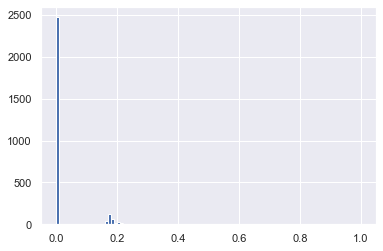

In [27]:
plt.hist(loan_data_2015_def['recovery_rate'], bins = 100)

(array([2.473e+03, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.660e+02, 7.800e+01, 3.400e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

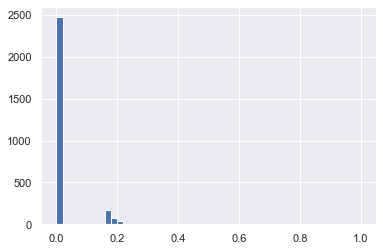

In [28]:
plt.hist(loan_data_2015_def['recovery_rate'], bins = 50)

We see a lot of the observations have a recovery rate of zero. There is a two stage approach for LGD model here.

1) Is recovery rate equal to or greater than 0? - We can use Logistic Regression here.

2) If recovery rate is greater than 0, how much exactly is it? - We can use Linear Regression here.

To summarize, we are going to use a Logistic Regression model to estimate whether the recovery rate is 0 or is greater than 0. Then, for accounts where recovery rate is greater than 0, we are going to use a linear regression model to estimate how much exactly it is.

In [29]:
loan_data_2015_def['recovery_rate_0_1'] = np.where(loan_data_2015_def['recovery_rate'] == 0, 0, 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
loan_data_2015_def['recovery_rate_0_1']

136692    0
141787    0
142644    0
146011    0
164645    0
165845    0
165912    0
165945    0
168626    0
168684    0
173117    0
175661    0
180051    0
181310    0
181328    0
184458    0
188569    0
189050    0
189329    0
190927    0
191004    0
193007    0
193650    0
193779    0
193808    0
195437    0
196211    0
196240    0
196335    0
199159    0
199362    0
199555    0
199708    0
199941    0
201143    0
202415    0
208148    0
209410    0
210157    0
211508    0
211643    0
211799    0
211874    0
212261    0
212679    0
213231    0
213369    0
214023    0
214770    0
215877    0
215936    0
216508    0
216582    0
216697    0
216709    0
216845    0
217092    0
217167    0
217662    0
218594    0
218863    0
218932    0
219446    0
219798    0
220078    0
220585    0
220600    0
220829    0
221059    0
221680    0
221972    0
222331    0
223099    0
224054    0
225025    0
225145    0
225267    0
225656    0
225765    0
225811    0
225953    0
225999    0
226193    0
2263

(array([  2.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          3.,   5.,   3.,   3.,   6.,  29.,  35.,  36., 110.,  67.,  97.,
         76.,  56., 195.,  53., 246., 222., 197., 384., 222., 376., 116.,
        219.]),
 array([0.042205  , 0.05178295, 0.0613609 , 0.07093885, 0.0805168 ,
        0.09009475, 0.0996727 , 0.10925065, 0.1188286 , 0.12840655,
        0.1379845 , 0.14756245, 0.1571404 , 0.16671835, 0.1762963 ,
        0.18587425, 0.1954522 , 0.20503015, 0.2146081 , 0.22418605,
        0.233764  , 0.24334195, 0.2529199 , 0.

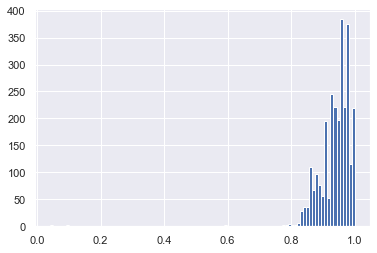

In [31]:
plt.hist(loan_data_2015_def['CCF'], bins = 100)

For the EAD model, directly applying a linear regression would produce satisfactory results. So for CCF, we will use a multiple linear regression.

## 3. Split the data into train and test datasets.

### LGD Model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_2015_def.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                           loan_data_2015_def['recovery_rate_0_1'], test_size=.2, random_state=42)



In [34]:
#loan_data_2015_def.head()

In [35]:
#All of our dummies and continuous variables
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [36]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [37]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [38]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis=1)

In [39]:
lgd_inputs_stage_1_train.dtypes

grade:A                                  int64
grade:B                                  int64
grade:C                                  int64
grade:D                                  int64
grade:E                                  int64
grade:F                                  int64
home_ownership:MORTGAGE                  int64
home_ownership:OWN                       int64
verification_status:Not Verified         int64
verification_status:Source Verified      int64
purpose:car                              int64
purpose:debt_consolidation               int64
purpose:educational                      int64
purpose:home_improvement                 int64
purpose:house                            int64
purpose:major_purchase                   int64
purpose:medical                          int64
purpose:moving                           int64
purpose:other                            int64
purpose:renewable_energy                 int64
purpose:small_business                   int64
purpose:vacat

Now lgd_inputs_stage_1_train contains only the input variables we need for the model.

## 4. Build a logistic regression model for the first stage: to predict whether the recovery rate would be 0 or greater than 0.

### Estimating the Model

Remember, the Logistic Regression class in sklearn is not able to give us p-values. So we have to alter it a bit here.

In [40]:
# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.pinv(F_ij) ## Inverse Information Matrix !!!!!!CHANGED INV TO PINV!!!!!!!!!!
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values


In [41]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Let's create a summary table with regression coefficients to help explain what this model says.

In [42]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [43]:
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

### Testing the Model

In [44]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-5.042303e-04,NaN
1,grade:A,-6.367172e-05,0.999945
2,grade:B,-1.554429e-05,0.999984
3,grade:C,-1.836035e-04,0.999775
4,grade:D,-2.734997e-04,0.999613
5,grade:E,6.250091e-05,0.999903
6,grade:F,-1.226798e-05,0.999981
7,home_ownership:MORTGAGE,-6.302737e-05,0.999674
8,home_ownership:OWN,1.112381e-04,0.999613
9,verification_status:Not Verified,-3.024124e-04,0.998784


Most of the p-values are not statistically significant. This means that if we discard these variables out of the model, its predictive power will remain the same. We will leave these out to simplify the model.


## 5. Test the model performance on the test dataset.

In [45]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [46]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis=1)

In [47]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [48]:
y_hat_test_lgd_stage_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

We get raw predictions about the recovery rate. But it would be better to get the estimated probabilities of the recovery rate values.

In [49]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [50]:
y_hat_test_proba_lgd_stage_1

array([[0.91932589, 0.08067411],
       [0.85144921, 0.14855079],
       [0.87767028, 0.12232972],
       ...,
       [0.9012763 , 0.0987237 ],
       [0.9226566 , 0.0773434 ],
       [0.91951988, 0.08048012]])

It would be sufficient to only keep the recovery rate greater than 0.

In [51]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [52]:
y_hat_test_proba_lgd_stage_1

array([0.08067411, 0.14855079, 0.12232972, 0.06752021, 0.1357557 ,
       0.08713797, 0.14777588, 0.09638545, 0.08500792, 0.09362983,
       0.06959061, 0.12401023, 0.09760587, 0.13301626, 0.17291412,
       0.06525055, 0.11047661, 0.11252089, 0.09500659, 0.10223228,
       0.09365879, 0.20104544, 0.1253002 , 0.12733343, 0.07463133,
       0.19910124, 0.08373216, 0.12592162, 0.04917621, 0.07295161,
       0.08249074, 0.13608761, 0.11521894, 0.13569864, 0.08599139,
       0.17798957, 0.19652006, 0.20933614, 0.09432322, 0.1191965 ,
       0.08806726, 0.13143074, 0.18990284, 0.06711605, 0.14975693,
       0.12521617, 0.11252987, 0.17848256, 0.11594283, 0.12339865,
       0.09863387, 0.1366376 , 0.26054554, 0.09916586, 0.06154709,
       0.16857508, 0.09667805, 0.08688277, 0.16107672, 0.07128411,
       0.13570202, 0.09790573, 0.06113639, 0.13657207, 0.07976826,
       0.11476707, 0.12539857, 0.10583634, 0.087024  , 0.11451747,
       0.21281146, 0.08780606, 0.15382644, 0.0648644 , 0.10015

In [53]:
np.average(y_hat_test_proba_lgd_stage_1)

0.1174113722128869

This result shows us the probabilities related to the test inputs. We will now test the accuracy.

In [54]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [55]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [56]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis=1)

In [57]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [58]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [59]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
334903,0,0.080674
391743,0,0.148551
335984,0,0.122330
337769,0,0.067520
374650,0,0.135756


### Estimating Model Accuracy

In [60]:
tr = .11
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)


In [61]:
#df_actual_predicted_probs['y_hat_test_lgd_stage_1']

In [62]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,234,264
1,23,34


We see a lot of incorrectly classified as 0 values in the confusion matrix (2742), while 4222 are correctly classified as being greater than 0.

In [63]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.421622,0.475676
1,0.041441,0.061261


In [64]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.4828828828828829

Our model's accuracy is 48%, so its not a good model. Let's calculate the ROC.

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

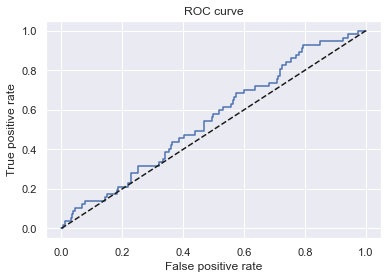

In [67]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_ = plt.title('ROC curve')


In [68]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.5519270062706968

We get a score of around 55%. This is still not good.

Since this is still the first part of LGD, it is more important to have a large proportion of correctly classified values that are greater than 0 than to have correctly classified 0's.

This is because at the second stage of the model, some of the values classified as greater than or equal to 0 can still be estimated as equal to 0

#### Saving the Model

In [6]:
#import pickle

In [70]:
#pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1_2015.sav', 'wb'))

## 6. Then, to build a model for the second stage: to predict how much exactly the recovery rate is if it’s greater than 0, sample only the observations where recovery rate is greater than 0 from the initial dataset.

### Stage 2 Linear Regression

In [71]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [72]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.pinv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

## 7. Split these data into train and test datasets. Train a linear regression model for the second stage and test how well it predicts using the test data.

In [73]:
lgd_stage_2_data = loan_data_2015_def[loan_data_2015_def['recovery_rate_0_1'] == 1]

In [74]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(loan_data_2015_def.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_2015_def['recovery_rate'], test_size = 0.2, random_state = 42)


In [75]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [77]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [78]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [80]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.490722e-01,NaN
1,grade:A,-1.017158e-02,0.644
2,grade:B,1.691571e-03,0.925
3,grade:C,-7.465657e-03,0.625
4,grade:D,-7.454275e-03,0.569
5,grade:E,1.322228e-03,0.910
6,grade:F,8.228640e-04,0.943
7,home_ownership:MORTGAGE,-6.033640e-04,0.869
8,home_ownership:OWN,1.340184e-02,0.015
9,verification_status:Not Verified,-6.431103e-03,0.177


Here, the coefficient shows the change in the dependent variable that is going to occur as a result of a unit change in the repective independent variable.

For example, if the purpose of the loan is house, the recovery rate would be 3.52% higher.

Every percentage increase in interest rate is expected to result in .0631% lower.

### Linear Regression Evaluation

In [81]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model.

In [82]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [83]:
lgd_inputs_stage_2_test.columns.values
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [84]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [85]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [86]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [87]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

,recovery_rate,0
recovery_rate,1.000000,0.131864
0,0.131864,1.000000


The correlation between actual and predicted values is about 0.131. This is weak to moderate positive correlation, but satisfactory for an LGD model. Let's assess the model another way.

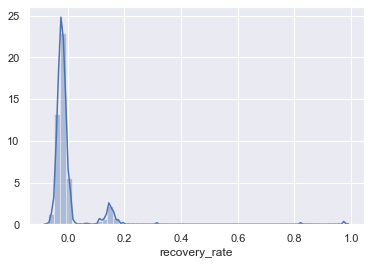

In [88]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# We plot the distribution of the residuals.

The distribution resembles a normal distribution, and the residuals are symmetrically distributed around zero.

In [89]:
#pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2_2015.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

## 8. Finally, write some code that combines the predictions from the models on the two stages and run it on the test dataset you used to test the performance of the first stage model.

### Combining Stages 1 and 2

In [90]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [91]:
y_hat_test_lgd_stage_2_all

array([ 7.08001261e-03,  1.84743479e-02,  2.13784868e-02,  2.16062114e-02,
        2.10447974e-02,  1.56199151e-02,  5.96473476e-03,  3.24372841e-02,
        2.03922998e-02,  2.30756611e-02,  3.17750415e-02,  1.71612830e-02,
        2.20983106e-02,  1.44515175e-02,  3.52240550e-02,  1.67625424e-02,
       -6.17183498e-03,  3.28262934e-02,  1.73118041e-02,  1.04354070e-02,
        3.18688383e-02,  1.58697643e-02,  2.03453663e-02,  2.54157169e-02,
        3.46870259e-02,  3.97326611e-02,  1.28961778e-02,  3.06171070e-02,
        8.61950984e-03,  2.37567899e-02,  2.55742696e-02,  2.61955542e-02,
        1.12093485e-02, -4.58996386e-04,  2.03756372e-02,  1.42886217e-02,
        8.04378109e-03,  1.11258101e-02,  1.02055345e-02,  2.42660633e-02,
        3.20993139e-02,  3.87508796e-02,  6.39982252e-02,  1.33144326e-02,
        2.73462067e-02,  3.25566531e-02,  4.61269759e-02,  3.00370646e-02,
        3.08712477e-02,  1.62023224e-02,  2.74809672e-02,  1.66706569e-03,
        4.25755609e-02,  

In [92]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
# Here we combine the predictions of the models from the two stages.

In [93]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,555.0
mean,0.0
std,0.0
min,-0.0
25%,0.0
50%,0.0
75%,0.0
max,-0.0


## EAD Model

The dependent variable for the EAD model is the credit conversion factor (CCF): The proportion of the original amount of the loan that is still outstanding at the moment when the borrower defaulted.

In [94]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_2015_def.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1),
                                                                                          loan_data_2015_def['CCF'], test_size = 0.2, random_state = 42)


In [95]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [96]:
ead_inputs_train = ead_inputs_train[features_all]

In [97]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [98]:
reg_ead = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
feature_name = ead_inputs_train.columns.values

In [100]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.155865e+00,NaN
1,grade:A,2.031880e-02,6.442508e-01
2,grade:B,1.722614e-02,9.251723e-01
3,grade:C,1.431220e-02,6.251578e-01
4,grade:D,1.206921e-02,5.686288e-01
5,grade:E,1.304263e-02,9.100111e-01
6,grade:F,1.828599e-03,9.425413e-01
7,home_ownership:MORTGAGE,-3.602609e-03,8.691670e-01
8,home_ownership:OWN,-1.025477e-03,1.524223e-02
9,verification_status:Not Verified,5.119462e-03,1.768963e-01


Positive coefficients indicate an increase in the CCF (higher risk)

Negative coefficients indicate a decrease in the CCF (lower risk)

For example, if a borrower has an external credit rating grade:A, their CCF is expected to be about 2.03% higher than the conversion rate they'd have with an external grade:G (the reference category).

Looks like best borrowers are the ones that have an external credit rating grade:A. What about the continuous variables?

If we look at interest rate, with each percentage increase of interest rate, the expected CCF would be about .209% higher. With inq_last_6mths, the CCF would be about .00996% higher.


## Model Validation

In [102]:
ead_inputs_test = ead_inputs_test[features_all]
# Here we keep only the variables we need for the model.

In [103]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [104]:
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [105]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [106]:
ead_targets_test_temp = ead_targets_test

In [107]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [108]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

,CCF,0
CCF,1.000000,0.319751
0,0.319751,1.000000


We see the correlation between actual and predicted values is more than 0.31. This is a moderate positive correlation.

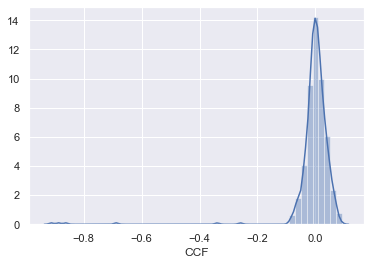

In [109]:
sns.distplot(ead_targets_test - y_hat_test_ead)
# We plot the distribution of the residuals.

We see a normal distribution with a mean of 0. The model's predictive power here is relatively good.


In [110]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,555.000000
mean,0.937123
std,0.027250
min,0.878693
25%,0.914571
50%,0.936759
75%,0.956757
max,1.009396


The min predictive power is a bit greater than 87%. However, the max predictive value is more than 100.9%. Note that CCF values cannot be greater than 1.

We see predictive values greater than 1 b/c the linear regression model is not constrained to produce predictive values in the interval (0,1)

In [111]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [112]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,555.000000
mean,0.937051
std,0.027074
min,0.878693
25%,0.914571
50%,0.936759
75%,0.956757
max,1.000000


Now we have to evaluate all 3 models (PD, LGD, and EAD) to calculate the expected loss.

## Expected Loss

This is the sum of the expected losses of all accounts.

In [113]:
loan_data_2015.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0,10.0,1990-02-01,334.0,60,2015-12-01,24.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul

In [114]:
loan_data_2015['mths_since_last_delinq'].fillna(0, inplace = True)

In [115]:
loan_data_2015['mths_since_last_record'].fillna(0, inplace = True)

In [116]:
loan_data_2015_lgd_ead = loan_data_2015[features_all]

In [117]:
loan_data_2015_lgd_ead = loan_data_2015_lgd_ead.drop(features_reference_cat, axis = 1)

In [118]:
loan_data_2015['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_2015_lgd_ead)


In [119]:
loan_data_2015['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_2015_lgd_ead)


In [120]:
loan_data_2015['recovery_rate'] = loan_data_2015['recovery_rate_st_1'] * loan_data_2015['recovery_rate_st_2']


In [121]:
loan_data_2015['recovery_rate'] = np.where(loan_data_2015['recovery_rate'] < 0, 0, loan_data_2015['recovery_rate'])
loan_data_2015['recovery_rate'] = np.where(loan_data_2015['recovery_rate'] > 1, 1, loan_data_2015['recovery_rate'])


Remember, LGD = 1 - Recovery Rate

In [122]:
loan_data_2015['LGD'] = 1 - loan_data_2015['recovery_rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.

In [123]:
loan_data_2015['LGD'].describe()

count    421094.000000
mean          0.999997
std           0.001552
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

Let's calculate EAD.

In [124]:
loan_data_2015['CCF'] = reg_ead.predict(loan_data_2015_lgd_ead)
# We apply the EAD model to calculate estimated credit conversion factor.

In [125]:
loan_data_2015['CCF'] = np.where(loan_data_2015['CCF'] < 0, 0, loan_data_2015['CCF'])
loan_data_2015['CCF'] = np.where(loan_data_2015['CCF'] > 1, 1, loan_data_2015['CCF'])
# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.

In [126]:
loan_data_2015['EAD'] = loan_data_2015['CCF'] * loan_data_2015_lgd_ead['funded_amnt']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.

In [127]:
loan_data_2015['EAD'].describe()
# Shows some descriptive statisics for the values of a column.

count    421094.000000
mean      14736.129783
std        8355.312502
min           0.000000
25%        8200.188930
50%       13426.067775
75%       20000.000000
max       35000.000000
Name: EAD, dtype: float64

In [203]:
#loan_data_2015.head()

For PD, we need an entirely different set of variables. They were all dummy variables we created specifically for the PD model.


In [204]:
#loan_data_inputs_train = loan_data_inputs_train.reset_index()

In [205]:
#loan_data_inputs_train.head()

In [206]:
#loan_data_inputs_test = loan_data_inputs_test.reset_index()

In [207]:
#loan_data_inputs_test.head()

In [133]:
#loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)


In [208]:
loan_data_inputs_pd = loan_2015

In [209]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')


In [210]:
loan_data_inputs_pd.shape

(421094, 320)

In [211]:
loan_data_inputs_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:Rent_Other_None_Any,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:2

In [212]:
loan_data_inputs_pd.dtypes

id                                                int64
member_id                                         int64
loan_amnt                                         int64
funded_amnt                                       int64
funded_amnt_inv                                 float64
term                                             object
int_rate                                        float64
installment                                     float64
grade                                            object
sub_grade                                        object
emp_title                                        object
emp_length                                       object
home_ownership                                   object
annual_inc                                      float64
verification_status                              object
issue_d                                          object
loan_status                                      object
pymnt_plan                                      

In [213]:
#loan_data_inputs_pd = loan_data_inputs_pd.rename(columns={'index': 'Unnamed: /n 0.1'})

In [214]:
#loan_data_inputs_pd.head()

Time to calculate PD! To do this, we only need the variables that are a part of the PD model estimation.

In [215]:
#All of our dummies and continuous variables
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'acc_now_delinq:0',
'acc_now_delinq:>=1', 
]

In [216]:
ref_categories_pd = ['grade:G',
'home_ownership:Rent_Other_None_Any',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'acc_now_delinq:0']

In [217]:
len(loan_data_inputs_pd.columns)

320

In [218]:
loan_data_inputs_pd.dtypes

id                                                int64
member_id                                         int64
loan_amnt                                         int64
funded_amnt                                       int64
funded_amnt_inv                                 float64
term                                             object
int_rate                                        float64
installment                                     float64
grade                                            object
sub_grade                                        object
emp_title                                        object
emp_length                                       object
home_ownership                                   object
annual_inc                                      float64
verification_status                              object
issue_d                                          object
loan_status                                      object
pymnt_plan                                      

In [219]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]
# Here we keep only the variables we need for the model.

In [220]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)
# Here we remove the dummy variable reference categories.

In [221]:
loan_data_inputs_pd_temp.isnull().any()

grade:A                    False
grade:B                    False
grade:C                    False
grade:D                    False
grade:E                    False
grade:F                    False
home_ownership:OWN         False
home_ownership:MORTGAGE    False
initial_list_status:w      False
term:36                    False
emp_length:1               False
emp_length:2-4             False
emp_length:5-6             False
emp_length:7-9             False
emp_length:10              False
int_rate:<9.548            False
int_rate:9.548-12.025      False
int_rate:12.025-15.74      False
int_rate:15.74-20.281      False
acc_now_delinq:>=1         False
dtype: bool

In [223]:
#loan_data_inputs_pd_temp['mths_since_last_delinq'].fillna((loan_data_inputs_pd_temp['mths_since_last_delinq'].mean()), inplace=True)

In [224]:
#loan_data_inputs_pd_temp['mths_since_last_record'].fillna((loan_data_inputs_pd_temp['mths_since_last_record'].mean()), inplace=True)


In [225]:
#loan_data_inputs_pd_temp.isnull().any()

In [226]:
import pickle

In [227]:
reg_pd = pickle.load(open('pd_model_2015.sav', 'rb'))
# We import the PD model, stored in the 'pd_model.sav' file.

In [228]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

array([0.0013763 , 0.00339331, 0.01902935, ..., 0.02704334, 0.03879034,
       0.01367787])

The first number of each lower level array is the probability of 0 (probability of default), while the second is the probability of 1 (probability of non-default)

In [229]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

In [230]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
0    0.001376
1    0.003393
2    0.019029
3    0.001775
4    0.005259
Name: PD, dtype: float64

In [231]:
loan_data_inputs_pd['PD'].describe()
# Shows some descriptive statisics for the values of a column.

count    421094.000000
mean          0.018623
std           0.017483
min           0.001055
25%           0.006634
50%           0.012884
75%           0.024959
max           0.234679
Name: PD, dtype: float64

In [233]:
loan_data_preprocessed_new = pd.concat([loan_data_2015, loan_data_inputs_pd], axis = 1)
# We concatenate the dataframes where we calculated LGD and EAD and the dataframe where we calculated PD along the columns.

In [234]:
loan_data_preprocessed_new.shape

(421094, 531)

In [235]:
loan_data_preprocessed_new.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_l

In [236]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']
# We calculate Expected Loss. EL = PD * LGD * EAD.

In [237]:
loan_data_preprocessed_new['EL'].describe()
# Shows some descriptive statisics for the values of a column.

count    421094.000000
mean        278.675721
std         357.425197
min           0.000000
25%          70.096435
50%         154.459712
75%         338.294632
max        6270.161604
Name: EL, dtype: float64

We can see that the average expected loss per exposure is about $278. Now we can easily check expected loss for every single loan.

In [238]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,35000,35000,0.001376,1.0,35000.0,48.170588
1,8650,8650,0.003393,1.0,8650.0,29.352158
2,4225,4225,0.019029,1.0,4225.0,80.399006
3,10000,10000,0.001775,1.0,10000.0,17.750157
4,20000,20000,0.005259,1.0,20000.0,105.189910


In [239]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,421094.000000,421094.000000
mean,15240.255561,15240.255561
std,8571.313525,8571.313525
min,1000.000000,1000.000000
25%,8500.000000,8500.000000
50%,14000.000000,14000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


We can also calculate the total expected loss on portfolio level.


In [240]:
loan_data_preprocessed_new['EL'].sum()
# Total Expected Loss for all loans.

117348674.2472022

Let's put this value into perspective. It makes sense to calculate the EL as a proportion of the total funded amount.


In [241]:
loan_data_preprocessed_new['funded_amnt'].sum()
# Total funded amount for all loans.

funded_amnt    6417580175
funded_amnt    6417580175
dtype: int64

In [242]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.
####
####
####
# THE END.

funded_amnt    0.018286
funded_amnt    0.018286
dtype: float64